In [83]:
from mpl_toolkits.mplot3d.axes3d import math
%pip install yfinance > /dev/null
import scipy.stats
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import time
import requests
import io
import os
import math
from scipy.stats import shapiro, normaltest, anderson, norm
import seaborn as sns
from tqdm import tqdm_notebook
from scipy import optimize

Note: you may need to restart the kernel to use updated packages.


The system cannot find the path specified.


In [84]:
log_returns = pd.read_csv('data/log_returns.csv')

In [85]:
log_returns

,Date,3IN,888,AAIF,AAL,AAS,ABD,ABDN,ABF,ACIC,...,WIZZ,WKP,WPP,WTAN,WTB,WWH,XAR,XPP,XPS,ZTF
0,2018-01-03 00:00:00+00:00,0.009500,0.006449,0.006889,-0.008057,0.009434,0.004149,-0.006840,0.020656,0.011209,...,-0.002165,0.007114,-0.025385,0.005561,0.001007,0.007905,0.006901,0.014389,0.002635,0.008762
1,2018-01-04 00:00:00+00:00,0.002360,0.000714,0.013637,0.014307,0.002345,0.010341,0.012700,0.001761,0.009509,...,-0.020523,-0.001013,0.012204,0.011030,0.006771,0.007843,0.002747,0.028171,-0.007926,-0.005467
2,2018-01-05 00:00:00+00:00,0.007050,0.007821,0.004505,-0.000997,-0.002345,0.004107,-0.000467,0.013976,0.014096,...,0.011818,0.026508,0.015423,0.003650,-0.001751,0.005842,0.031063,0.000000,0.002649,0.009820
3,2018-01-08 00:00:00+00:00,0.002342,-0.009249,0.011173,0.014611,0.000000,0.004090,0.010235,-0.010464,0.000000,...,0.002183,0.002957,-0.007870,0.000000,-0.009560,-0.007797,0.075532,0.013794,-0.002649,0.002169
4,2018-01-09 00:00:00+00:00,0.002333,0.015603,-0.004454,0.030269,-0.004706,0.004073,0.006689,-0.003513,0.000000,...,-0.004098,-0.005923,0.008243,0.005450,-0.003292,0.017459,-0.026235,-0.002744,0.002649,-0.017487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2018-12-20 00:00:00+00:00,0.015165,-0.037571,-0.002601,-0.028820,0.010050,-0.004556,0.003379,-0.003298,-0.005753,...,-0.004351,-0.013088,-0.028882,-0.021528,0.000896,-0.024541,-0.013245,0.018780,0.012579,0.020409
247,2018-12-21 00:00:00+00:00,0.003993,-0.028399,0.015504,0.028021,0.000000,-0.004577,0.013796,0.004238,-0.007722,...,0.002903,-0.019347,-0.002079,0.005168,-0.001792,-0.014599,0.000000,-0.009346,0.033797,0.093165
248,2018-12-24 00:00:00+00:00,-0.006091,-0.053121,-0.012903,-0.007104,-0.012073,0.009132,-0.016777,-0.022815,0.000000,...,-0.004357,-0.036051,-0.017493,-0.021887,0.013139,-0.012685,-0.052251,-0.018958,-0.033797,0.012195
249,2018-12-27 00:00:00+00:00,-0.006512,0.014158,-0.007823,-0.014479,0.022023,-0.013730,-0.003190,-0.018928,-0.005831,...,-0.009506,-0.000633,-0.023570,-0.001054,-0.010006,-0.010695,0.016466,0.028304,0.015504,0.003026


In [86]:

stats_all = pd.DataFrame(columns = ['Expected returns', 'Standard deviation'])
stats_all['Expected returns'] = log_returns.mean()
stats_all['Standard deviation'] = log_returns.std()
stats_all

C:\Users\Andrew\AppData\Local\Temp\ipykernel_15008\2909221713.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats_all['Expected returns'] = log_returns.mean()
C:\Users\Andrew\AppData\Local\Temp\ipykernel_15008\2909221713.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats_all['Standard deviation'] = log_returns.std()


,Expected returns,Standard deviation
3IN,0.000758,0.008050
888,-0.001853,0.021774
AAIF,-0.000280,0.010566
AAL,0.000566,0.022364
AAS,-0.000114,0.009960
...,...,...
WWH,-0.000227,0.011628
XAR,-0.003489,0.038060
XPP,-0.001775,0.018614
XPS,-0.000405,0.019001


In [87]:
bonds = pd.read_csv('data/bonds.csv')
bonds.set_index('Дата', inplace=True)
bonds.drop(columns = ['Цена', 'Макс.', 'Мин.', 'Изм. %'], inplace=True)
bonds_l = bonds['Откр.'].tolist()
bonds_l = [i.replace(',', '.') for i in bonds_l]
bonds_l = pd.Series(bonds_l)
#bonds = bonds.append(bonds_l.T, ignore_index=True)
#bonds['Open'] = bonds_l
#bonds.drop(['Откр.'])
bonds_l = bonds_l.iloc[::-1].astype(float)
bonds_returns = np.log(bonds_l / bonds_l.shift(1)).dropna()
Ef = bonds_returns.mean()
Ef

0.0024678492883447355

In [88]:
bonds_returns

289   -0.043992
288    0.128891
287   -0.014052
286    0.018692
285    0.013793
         ...   
4     -0.006333
3     -0.052163
2      0.116146
1      0.011848
0     -0.049497
Length: 290, dtype: float64

In [89]:
stats_all['Sharp Ratio'] = (log_returns.mean() - Ef) / log_returns.std()
stats20 = stats_all.sort_values(by=['Sharp Ratio'], ascending=False)
stats20 = stats20.head(20)
stats20

C:\Users\Andrew\AppData\Local\Temp\ipykernel_15008\1339920506.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats_all['Sharp Ratio'] = (log_returns.mean() - Ef) / log_returns.std()
C:\Users\Andrew\AppData\Local\Temp\ipykernel_15008\1339920506.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats_all['Sharp Ratio'] = (log_returns.mean() - Ef) / log_returns.std()


,Expected returns,Standard deviation,Sharp Ratio
PNL,0.006683,0.053384,0.078959
OCDO,0.002674,0.038284,0.005393
PLUS,0.002403,0.032382,-0.002014
GFRD,0.001622,0.053288,-0.015880
NANO,0.001548,0.039311,-0.023408
HIK,0.001741,0.025855,-0.028100
ZTF,0.001764,0.018678,-0.037664
DEC,0.001494,0.025162,-0.038713
OXB,0.001243,0.029698,-0.041251
FUTR,0.001091,0.028295,-0.048668


In [90]:
log_returns20 = log_returns[stats20.index]
log_returns20

,PNL,OCDO,PLUS,GFRD,NANO,HIK,ZTF,DEC,OXB,FUTR,LTI,KNOS,AO,GROW,DRX,LIO,CARR,PFG,SYNC,PRTC
0,0.000000,0.074836,0.221440,0.010035,0.011606,0.004951,0.008762,0.012626,-0.013882,0.000000,0.027108,0.000000,0.031110,0.000000,0.005130,-0.011276,-0.012024,0.003715,0.000000,0.039479
1,0.003665,0.034390,0.060838,0.005362,0.011472,0.000898,-0.005467,0.009988,0.068563,-0.018780,0.000000,0.038409,0.031918,0.000000,0.020977,0.010257,0.000000,0.003484,0.022087,0.006431
2,0.001219,-0.001371,-0.015518,0.006852,0.053667,0.012926,0.009820,0.000000,0.071667,-0.016727,0.000000,0.000000,0.046044,0.000000,0.009263,0.005089,-0.024491,0.000000,0.021609,0.012739
3,-0.002439,-0.018934,-0.010480,-0.009912,-0.010870,-0.045298,0.002169,-0.006231,0.034898,0.014354,0.001162,-0.002903,0.016529,0.000000,0.014085,0.018109,0.024491,0.026176,0.014151,-0.011138
4,0.000000,-0.010781,-0.005282,-0.004608,0.018051,-0.003714,-0.017487,0.006231,-0.012716,-0.004762,0.016129,0.020145,0.032261,0.000000,-0.000700,0.024620,0.126704,-0.012145,-0.011779,-0.003205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,-0.001268,-0.030009,-0.031480,0.021868,-0.002670,-0.047787,0.020409,-0.004454,-0.016727,-0.008247,0.006615,0.004988,0.026710,0.000000,-0.005543,0.007092,-0.009901,-0.016988,-0.003854,-0.014185
247,0.000000,0.019153,0.001559,-0.009193,-0.027102,-0.053182,0.093165,0.026433,-0.028465,0.012346,-0.028988,0.071973,-0.049255,0.018519,-0.010617,0.041528,-0.032016,0.029627,-0.009699,0.000000
248,-0.012771,-0.005995,0.013921,-0.000840,0.056089,0.018731,0.012195,-0.013129,-0.017195,0.000000,-0.039221,-0.044978,0.008110,-0.013857,-0.002813,-0.027493,0.032016,-0.019884,0.003891,-0.017291
249,0.000000,-0.020069,0.026527,-0.031585,-0.019673,-0.013343,0.003026,0.013129,0.000625,-0.031155,0.018649,-0.007290,0.038039,0.009259,-0.019915,0.003478,0.043803,-0.037754,0.005808,-0.007294


## Подготовка модели

По наблюдениям за  год оцените математические ожидания доходностей и матрицу ковариаций доходностей (используйте выборочную матрицу ковариаций). 

In [91]:
return_matrix, mean_vec, cov_matrix = log_returns20.values, stats20['Expected returns'], log_returns20.cov().values
return_matrix.shape, mean_vec.shape, cov_matrix.shape


((251, 20), (20,), (20, 20))

In [92]:
eigenvec = np.linalg.eigvals(cov_matrix)
# np.around(eigenvec,4)
print('Conditional number: ', max(eigenvec) /  min(eigenvec))

Conditional number:  13.07480255770502


In [93]:
gen_lst = []
for i in tqdm_notebook(range(10000)):
    stats_selected = stats_all.sample(40).sort_values(['Sharp Ratio'], ascending=False).iloc[:20]
    selected20 = log_returns[stats_selected.index]
    return_matrix, mean_vec, cov_matrix = selected20.values, stats_selected['Expected returns'], selected20.cov().values
    eigenvec = np.linalg.eigvals(cov_matrix)
    conditional_number = max(eigenvec) /  min(eigenvec)
    gen_lst.append((conditional_number, selected20))


C:\Users\Andrew\AppData\Local\Temp\ipykernel_15008\2694654448.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(10000)):


  0%|          | 0/10000 [00:00<?, ?it/s]

In [94]:
gen_lst = sorted(gen_lst, key=lambda x: x[0])
selected20 = gen_lst[0][1]
return_matrix, mean_vec, cov_matrix = selected20.values, selected20.mean().values, selected20.cov().values
eigenvec = np.linalg.eigvals(cov_matrix)
print('Conditional number: ', max(eigenvec) /  min(eigenvec))

Conditional number:  7.718570330380024


# Задание 1. Истинный оптимальный портфель в модели Марковица с заданным отношением к риску. 

Задана константа b. Решите задачу оптимизации

$ -E(x)+ b\sigma(x) \rightarrow min, $
$ x_1+x_2+\cdots+x_N =1$ $x_i \ge 0 $

(т.е. найдите оптимальный портфель с отношением к риску, равным b). Найдите и зафиксируйте веса портфеля и значение целевой функции.

Здесь $ E(x)= E_1 x_1+E_2 x_2+\cdots+E_N x_N$ , $ \sigma (x)= \sum \sum σ_{ij} x_ix_j $

### Примечание
Константа b подобрана таким образом, что истинный оптимальный CVaR портфель совпадает с истинным оптимальным портфелем п.1. Значение константы смотри в упражнениях к теме 

$b= \frac{1}{\sqrt{2\pi}}\frac{1}{{1-\beta}}exp(-\frac{(\Phi^{-1}(\beta))^2)}{2})$

где $\Phi$ - ф-ция стандартного нормального распределения, а $\beta$ - увeренность для CVaR

In [95]:
beta = 0.95

# ppf - percent point function for standart normal distribution
b = (np.sqrt(2 * np.pi) *(1 - beta) )**(-1) * np.exp(-(norm.ppf(beta)**2 / 2)) 
print('b: ', b)

b:  2.0627128075074257


In [96]:
from cvxopt import matrix, solvers
from scipy.optimize import minimize


def risk_portfolio(X, cov_matrix):
    return np.sqrt(np.dot(np.dot(X, cov_matrix), X.T))
    
    
def objective_function(X, mean_vec, cov_matrix, b):
    return (-np.dot(mean_vec, X)) + b * np.dot(np.dot(X, cov_matrix), X.T)
    
    
def optimize_portfolio(mean_vec,
                       cov_matrix, 
                       b, 
                       bounds, 
                       objective_function=objective_function,
                       cvxopt=False):
    if cvxopt:
        r_avg = matrix(mean_vec)
        sigma = matrix(b*cov_matrix)
        n = mean_vec.shape[0]
        P = sigma
        q = matrix(-mean_vec)
        
        # inequality constraint 
        G = matrix( -np.identity(n) )
        h = matrix( np.zeros((n,1)) )  
        
        # equality constraint Ax = d; captures the constraint sum(x) == 1
        A = matrix(1.0, (1,n))
        d = matrix(1.0)
        sol = solvers.qp(P, q, G, h, A, d, show_progress=False)
        clear_output()
        return np.array([x for x in sol['x']])
    
    else: # scipy.minimize
        N = cov_matrix.shape[0]
        X = np.ones(N)
        X = X / X.sum()
        bounds = bounds * N

        constraints=[]
        constraints.append({'type': 'eq', 
                            'fun': lambda X: np.sum(X) - 1.0})

        return minimize(objective_function, X,
                        args=(mean_vec, cov_matrix, b), method='SLSQP',
                        constraints=constraints,
                        bounds=bounds).x


In [97]:
X = optimize_portfolio(mean_vec, cov_matrix, b, bounds=((0, 1),))

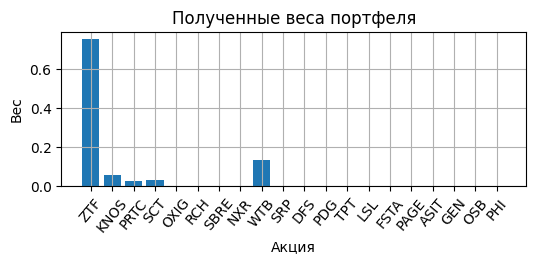

In [98]:
def plot_weights_histogram(weights, data):
    plt.figure(figsize=(6,2))
    x_values = selected20.columns
    x = np.arange(len(weights))
    plt.xlabel('Акция')
    plt.ylabel('Вес')
    height = weights
    plt.bar(x, height=height)
    plt.xticks(x, x_values, rotation=50)
    plt.grid()
    
plot_weights_histogram(X, selected20)
plt.title('Полученные веса портфеля')
pass


In [99]:
def plot_mean_var_map(df,x='Standard deviation', y='Expected returns', title='Карта активов:σ от E', figsize=(12, 6)):
    # получить карту риск от дохоности
    
    ax = df.plot(x=x, y=y, s = np.array([150]), kind='scatter',
                          figsize=figsize, 
                          edgecolor='black',
                          grid=True)
    plt.xlabel('Sigma', size=15)
    plt.ylabel('E', size=15)
    plt.title(title, size=16)

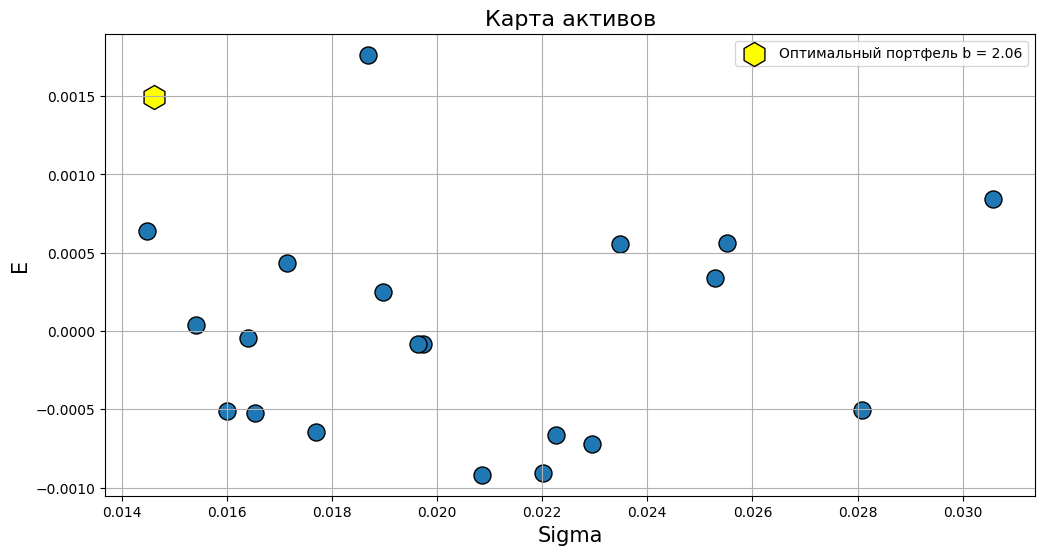

In [100]:
plot_mean_var_map(stats_all.loc[selected20.columns], title='Карта активов')
plt.scatter(risk_portfolio(X, cov_matrix),
            np.dot(mean_vec,X), 
            c='yellow',
            marker='h',
            s=300, 
            edgecolors='black',
            label='Оптимальный портфель b = %.2f' % b)
plt.legend()
pass

# Задание 2. Оценка неопределенности оптимального портфеля в модели Марковица с заданным отношением к риску. 

***2.1 Задайте число наблюдений $T=30$. С помощью генератора многомерного нормального распределения создайте выборку размера $Т$ из нормального распределения с вектором математических ожиданий  $E=(E_1, E_2, …, E_N)$ и матрицей ковариаций $(\sigma_i,j)$.***

In [101]:
T = 30
r_matrix_gen = np.random.multivariate_normal(mean_vec, cov_matrix, T)

***2.2. По построенной выборке сделайте оценку $E^{est}$ вектора математических ожиданий и оценку $ \sigma ^{est}_{i,j}$ матрицы ковариаций.***

In [102]:
mean_vec_est = np.mean(r_matrix_gen, axis=0)
cov_matrix_est = np.cov(r_matrix_gen.T)


In [103]:
import pprint

print('Истинный вектор средних:')
pprint.pprint(np.around(mean_vec, 3))
print()
print('Оценки вектора средних:')
pprint.pprint(np.around(mean_vec_est, 3))

Истинный вектор средних:
array([ 0.002,  0.001,  0.001,  0.001,  0.   , -0.001,  0.   ,  0.   ,
        0.001, -0.   , -0.   , -0.001, -0.001, -0.001, -0.   ,  0.   ,
       -0.001, -0.001, -0.001, -0.001])

Оценки вектора средних:
array([ 0.001,  0.014, -0.004,  0.011, -0.001, -0.007, -0.005,  0.002,
        0.004,  0.004, -0.002,  0.003,  0.005,  0.   , -0.002,  0.001,
        0.003, -0.001, -0.004,  0.001])


***2.3 Используя эти оценки решите задачу оптимизации***

$-E^{est}(x)+ b\sigma^{est}(x) \rightarrow min,$
$x_1 + x_2 + \cdots + x_N = 1, x_i \ge 0$

Здесь $E^{est}(x)= E^{est}_1 x_1+E^{est}_2 x_2+\cdots+E^{est}_N x_N$ , $ [\sigma^{est} (x)]^2= \sum \sum σ^{est}_{ij} x_ix_j$

(т.е. найдите выборочный оптимальный портфель с отношением к риску, равным b). Найдите и зафиксируйте веса портфеля и значение целевой функции.

In [104]:
X_est = optimize_portfolio(mean_vec_est, cov_matrix_est, b, bounds=((0, 1),))

***2.4 Сравните два портфеля: истинный (п.1) и выборочный (п.2.3).***

Оцените относительную ошибку в определении весов портфеля в норме Manhattan ($L1$ норма Минковского). Сделайте выводы. Сделайте сравнение в системе координат $(\sigma, E)$.

In [105]:
print('Истинные веса портфеля:')
pprint.pprint(np.around(X, 3))
print()
print('Оценки весов портфеля:')
pprint.pprint(np.around(X_est, 3))

Истинные веса портфеля:
array([0.753, 0.058, 0.024, 0.031, 0.   , 0.   , 0.   , 0.   , 0.134,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

Оценки весов портфеля:
array([0.   , 0.873, 0.   , 0.127, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])


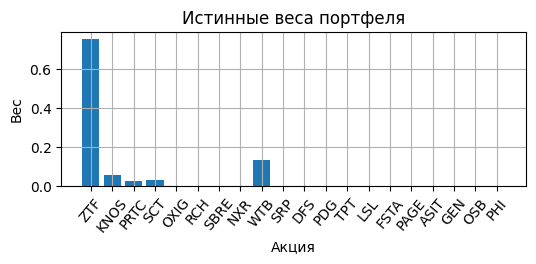

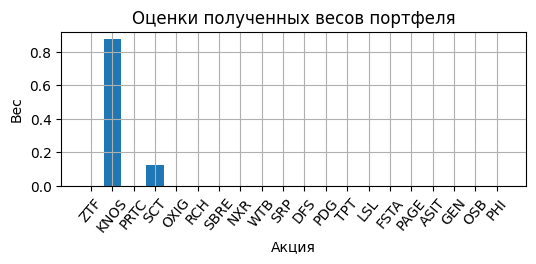

In [106]:
plot_weights_histogram(X, selected20)
plt.title('Истинные веса портфеля')
plt.show()
plot_weights_histogram(X_est, selected20)
plt.title('Оценки полученных весов портфеля')
pass

In [107]:
print('L1 норма вектора X - Xest:', np.around(np.linalg.norm(X - X_est, ord=1), 3))

L1 норма вектора X - Xest: 1.822


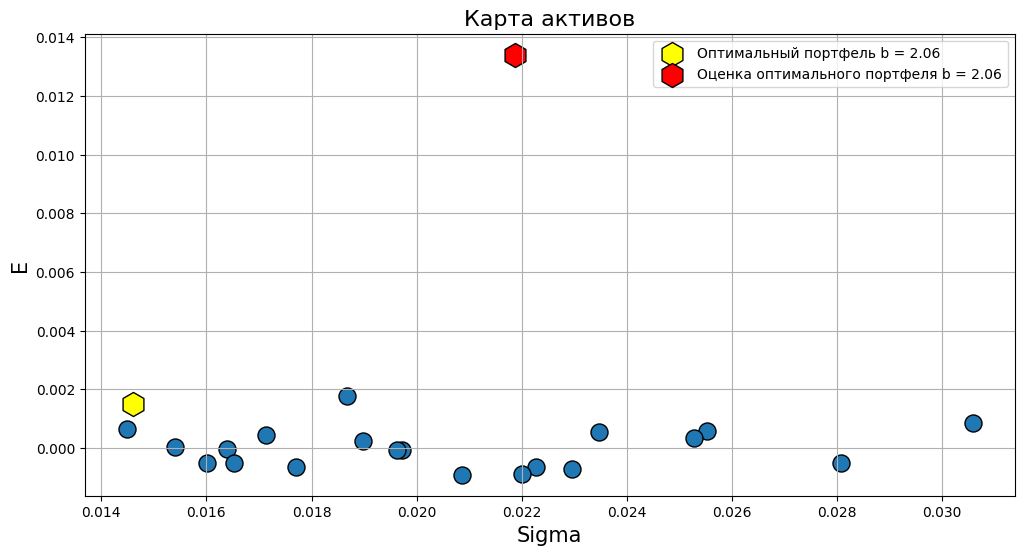

In [108]:
plot_mean_var_map(stats_all.loc[selected20.columns], title='Карта активов')
plt.scatter(risk_portfolio(X, cov_matrix),
            np.dot(mean_vec,X), 
            c='yellow',
            marker='h',
            s=300, 
            edgecolors='black',
            label='Оптимальный портфель b = %.2f' % b)
plt.scatter(risk_portfolio(X_est, cov_matrix_est),
            np.dot(mean_vec_est, X_est), 
            c='red',
            marker='h',
            s=300, 
            edgecolors='black',
            label='Оценка оптимального портфеля b = %.2f' % b)
plt.legend()
pass

Исходя из карты активов можно сделать вывод о том, что <b>оценка оптимального портфеля с заданным параметром $b = 2.06$ имеет зывышенную доходность и риск.</b>

***2.5. Повторите эксперимент $S=40$ раз и оцените среднюю относительную ошибку по $S$ повторениям эксперимента.***

Сделайте выводы.

Сделайте сравнение в системе координат $(\sigma, E)$

In [109]:
S = 40 

experiments = []

for i in tqdm_notebook(range(S)):
    experiment = {}
    experiment['i'] = i
    experiment['r_matrix_gen'] = np.random.multivariate_normal(mean_vec, cov_matrix, T)
    experiment['mean_vec_est'] = np.mean(experiment['r_matrix_gen'], axis=0)
    experiment['cov_matrix_est'] = np.cov(experiment['r_matrix_gen'].T)
    experiment['X_est'] =  optimize_portfolio( experiment['mean_vec_est'], 
                                              experiment['cov_matrix_est'], 
                                              b, 
                                              bounds=((0, 1),))
    experiment['L1-norm'] = np.linalg.norm(X - experiment['X_est'], ord=1)
    experiments.append(experiment)


C:\Users\Andrew\AppData\Local\Temp\ipykernel_15008\386144300.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(S)):


  0%|          | 0/40 [00:00<?, ?it/s]

In [110]:
l1_norms = [experiment['L1-norm'] for experiment in experiments]
l1_norms_mean  = np.mean(l1_norms)
l1_norms_std  = np.std(l1_norms)
print('Средняя L1-норма по %d экспериментам: %.3f' % (S, l1_norms_mean))
print('Примерный 95 прц. доверительный интервал: [%.3f, %.3f]' %
      (l1_norms_mean - 2*l1_norms_std, l1_norms_mean + 2*l1_norms_std))

Средняя L1-норма по 40 экспериментам: 1.731
Примерный 95 прц. доверительный интервал: [0.805, 2.656]


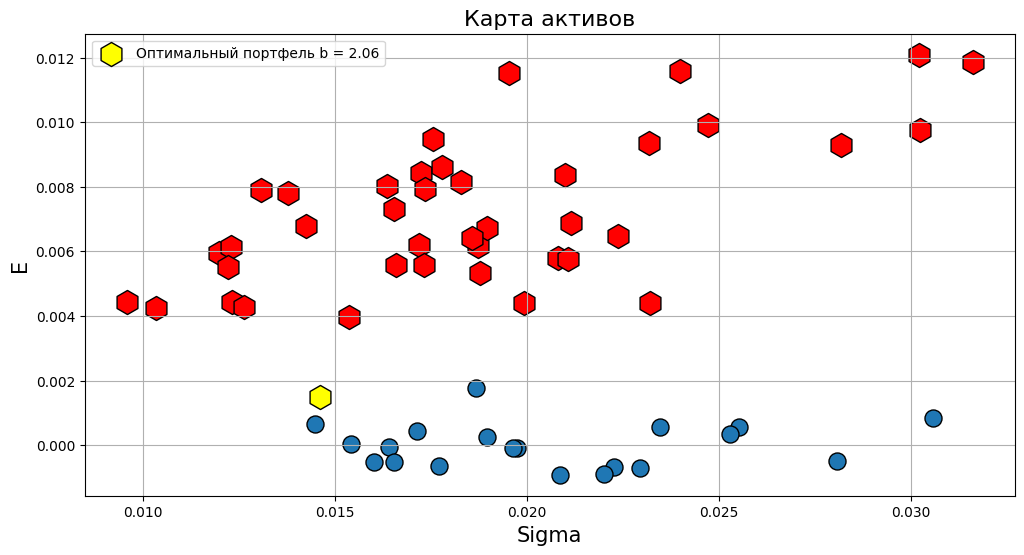

In [111]:
plot_mean_var_map(stats_all.loc[selected20.columns], title='Карта активов')

for experiment in experiments:
    plt.scatter(risk_portfolio(experiment['X_est'], experiment['cov_matrix_est']),
                np.dot(experiment['mean_vec_est'], experiment['X_est']), 
                c='red',
                marker='h',
                s=300, 
                edgecolors='black')
    
plt.scatter(risk_portfolio(X, cov_matrix),
            np.dot(mean_vec,X), 
            c='yellow',
            marker='h',
            s=300, 
            edgecolors='black',
            label='Оптимальный портфель b = %.2f' % b)
plt.legend()
pass

Исходя из сорока проведённых экспериментов, можно сделать вывод, что все сгенерированные портфели достаточно далеки от оптимального, и при этом каждый из них эффективнее по $E$, но лишь немного из них эффективнее по $\sigma$

***2.6 Предположите, что нам известны точные значения математических ожиданий $E=(E_1, E_2, …, E_N)$.***

Повторите пп. 2.2-2.5. используя оценку только матрицы ковариаций (т.е. решайте задачу оптимизации

$-E^{est}(x)+ b\sigma^{est}(x) \rightarrow min,$
$x_1+x_2+\cdots+x_N =1$ $x_i \ge 0$

Здесь $E^{est}(x)= E^{est}_1 x_1+E^{est}_2 x_2+\cdots+E^{est}_N x_N$ , $ \sigma^{est} (x)= \sum \sum σ^{est}_{ij} x_ix_j$

Сравните точность этих портфелей и портфелей п.2.3

In [112]:
experiments_with_true_mean = []

for i in tqdm_notebook(range(S)):
    experiment = {}
    experiment['i'] = i
    experiment['r_matrix_gen'] = np.random.multivariate_normal(mean_vec, cov_matrix, T)
    experiment['mean_vec_est'] = np.mean(experiment['r_matrix_gen'], axis=0)
    experiment['cov_matrix_est'] = np.cov(experiment['r_matrix_gen'].T)
    experiment['X_est'] =  optimize_portfolio(mean_vec,                     # используем истинный вектор средних
                                              experiment['cov_matrix_est'], 
                                              b, 
                                              bounds=((0, 1),))
    experiment['L1-norm'] = np.linalg.norm(X - experiment['X_est'], ord=1)
    experiments_with_true_mean.append(experiment)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_15008\1536234836.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(S)):


  0%|          | 0/40 [00:00<?, ?it/s]

In [113]:
l1_norms = [experiment['L1-norm'] for experiment in experiments_with_true_mean]
l1_norms_mean  = np.mean(l1_norms)
l1_norms_std  = np.std(l1_norms)
print('Средняя L1-норма по %d экспериментам: %.3f' % (S, l1_norms_mean))
print('Примерный 95 прц. доверительный интервал: [%.3f, %.3f]' %
      (l1_norms_mean - 2*l1_norms_std, l1_norms_mean + 2*l1_norms_std))

Средняя L1-норма по 40 экспериментам: 0.280
Примерный 95 прц. доверительный интервал: [0.069, 0.491]


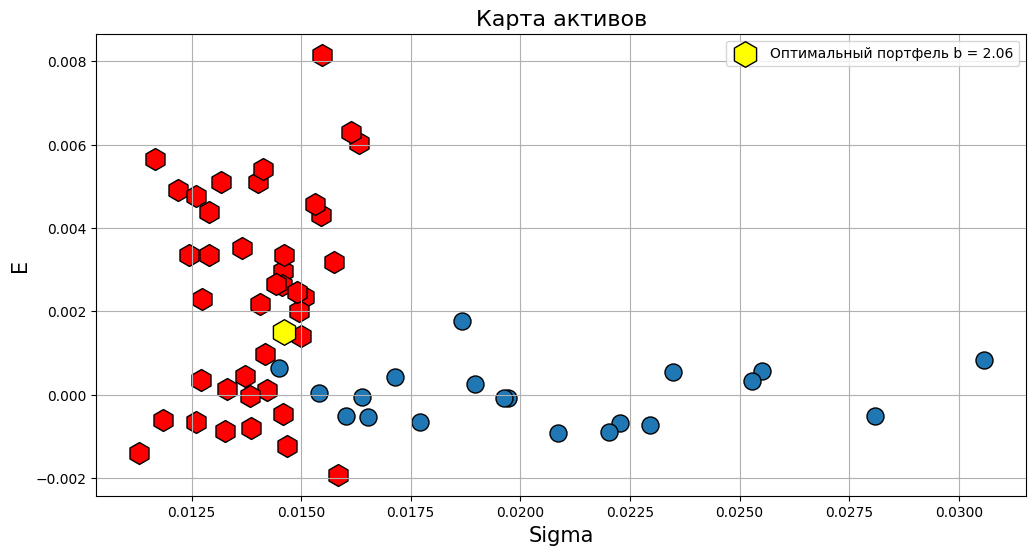

In [114]:
plot_mean_var_map(stats_all.loc[selected20.columns], title='Карта активов')

for experiment in experiments_with_true_mean:
    plt.scatter(risk_portfolio(experiment['X_est'], experiment['cov_matrix_est']),
                np.dot(experiment['mean_vec_est'], experiment['X_est']), 
                c='red',
                marker='h',
                s=250, 
                edgecolors='black')
plt.scatter(risk_portfolio(X, cov_matrix),
            np.dot(mean_vec,X), 
            c='yellow',
            marker='h',
            s=340, 
            edgecolors='black',
            label='Оптимальный портфель b = %.2f' % b)
plt.legend()
pass


Исходя из 40 проведенных экспериментов можно сделать вывод, что в большинстве случаев оценки весов достаточно близки по $\sigma$, но далеки по $E$. Появились портфели, которые располагаются ниже оптимального

# Задание 3. Оценка неопределенности оптимального CVaR портфеля

***3.1 Уровень значимости β выбран $0,95$. Число наблюдений $T$.***

Используя сгенерированные наблюдения из п.2.1 решите задачу ЛП для определения оптимального $CVaR_β$ портфеля. Найдите и зафиксируйте веса портфеля и значение целевой функции $CVaR$.

In [115]:
def cvar_objective_function(UXalpha, T, beta):
    return UXalpha[-1] + 1 / (T * (1 - beta)) * np.sum(UXalpha[:T])
    
def cvar_optimize_portfolio(r_matrix,
                            beta, 
                            cvar_objective_function=cvar_objective_function,
                            cvxopt=False):
    alpha  = 0 
    N = r_matrix.shape[1]
    X = np.ones(N)/ N 
   
    T = r_matrix.shape[0] 
    U = np.dot(r_matrix,  X) - alpha
    
    UXalpha = np.zeros(T+N+1)
    UXalpha[:T] = U
    UXalpha[T:N+T]= X
    UXalpha[-1] = alpha
    
    bounds_U = ((0, 100000000000),) * T
    bounds_X = ((0, 1.1),) * N
    bounds_alpha = ((-100000, 100000),)
    bounds = bounds_U + bounds_X + bounds_alpha
    
    
    constraints = []
    constraints.append({'type': 'eq', 'fun': lambda X: sum(X[T:N+T]) -1})
    def u_x_con(UXalpha, r_matrix, i):
        return np.dot(r_matrix[i], UXalpha[T:N+T]) + UXalpha[-1] - UXalpha[i],
    for i in range(T):
        constraints.append({'type': 'ineq', 
                            'fun': u_x_con,
                            'args': (r_matrix, i)})

    
    return minimize(cvar_objective_function, UXalpha,
                    args=(T, beta), method='SLSQP',
                    constraints=constraints,
                    bounds=bounds).x
    

In [116]:
%%time
result = cvar_optimize_portfolio(r_matrix_gen, beta)

CPU times: total: 141 ms
Wall time: 148 ms


In [117]:
T = 30
N = 20
UXalpha = result
cvar_X_est = UXalpha[T:N+T]
alpha_est  = UXalpha[-1]

In [118]:
print('Alpha CVAR портфеля:' ,round(alpha_est, 4))


Alpha CVAR портфеля: -0.0005


In [119]:
print('VAR CVAR портфеля на уровне 0.95:' ,round(np.quantile(-np.dot(r_matrix_gen, cvar_X_est), 0.95), 4))

VAR CVAR портфеля на уровне 0.95: -0.0005


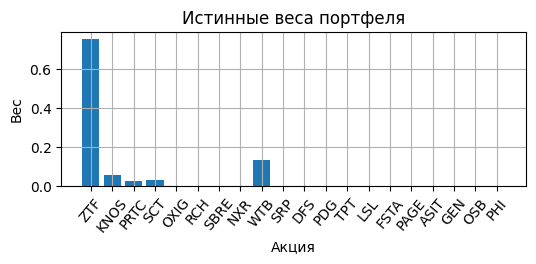

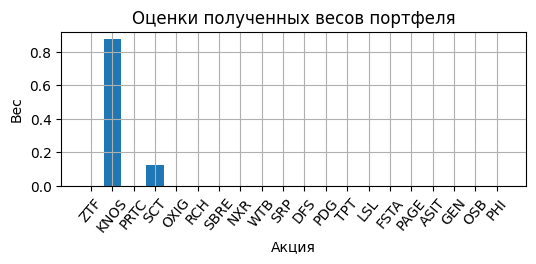

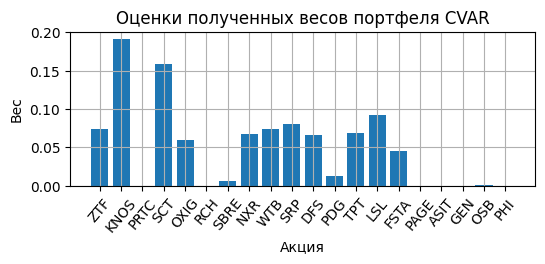

In [120]:
plot_weights_histogram(X, selected20)
plt.title('Истинные веса портфеля')
plt.show()
plot_weights_histogram(X_est, selected20)
plt.title('Оценки полученных весов портфеля')
plot_weights_histogram(cvar_X_est, selected20)
plt.title('Оценки полученных весов портфеля CVAR') 
pass


***3.2 Сравните два портфеля: истинный (п.1) и найденный в п.3.1.***

Оцените относительную ошибку в определении весов портфеля в норме Manhattan ($L1$ норма Минковского). Сравните с ошибкой портфеля из п. 2.3

In [121]:
print('L1 норма вектора X-Xest в 2.3 :', np.around(np.linalg.norm(X - X_est, ord=1), 3))
print('L1 норма вектора для CVAR X-cvar_Xest:', np.around(np.linalg.norm(X - cvar_X_est, ord=1), 3))

L1 норма вектора X-Xest в 2.3 : 1.822
L1 норма вектора для CVAR X-cvar_Xest: 1.527


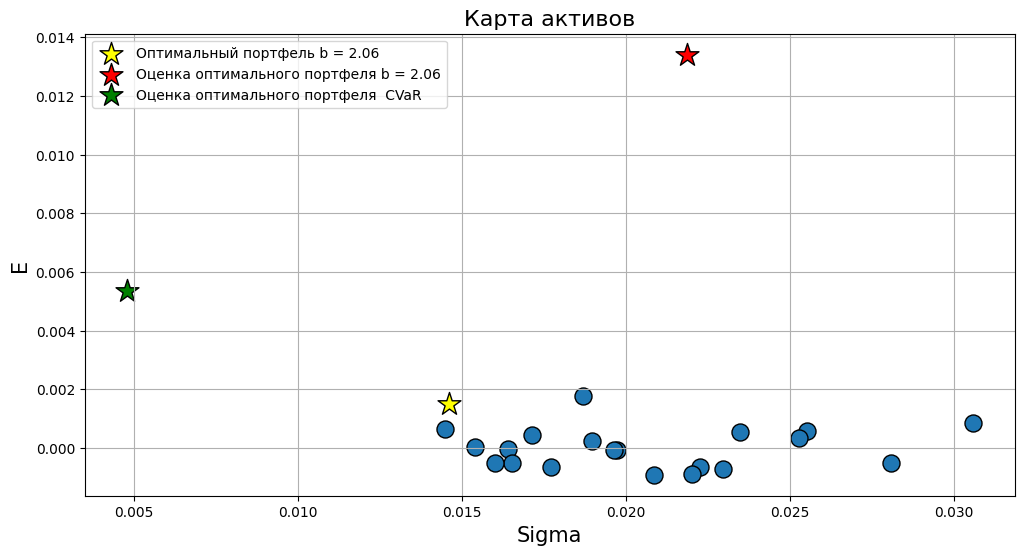

In [122]:
plot_mean_var_map(stats_all.loc[selected20.columns], title='Карта активов')
plt.scatter(risk_portfolio(X, cov_matrix),
            np.dot(mean_vec,X), 
            c='yellow',
            marker='*',
            s=300, 
            edgecolors='black',
            label='Оптимальный портфель b = %.2f' % b)

plt.scatter(risk_portfolio(X_est, cov_matrix_est),
            np.dot(mean_vec_est, X_est), 
            c='red',
            marker='*',
            s=300, 
            edgecolors='black',
            label='Оценка оптимального портфеля b = %.2f' % b)

plt.scatter(risk_portfolio(cvar_X_est, cov_matrix_est),
            np.dot(mean_vec_est, cvar_X_est), 
            c='green',
            marker='*',
            s=300, 
            edgecolors='black',
            label='Оценка оптимального портфеля  CVaR' % b)
plt.legend()
pass

По карте активов можно сделать вывод, что оценка оптимального портфеля по CVaR достаточно сильно отличается от оценки ранее сгенерированного портфеля, причём нельзя сказать, в какую сторону, так как риск и доходность у данной оценки меньше.

***3.3. Повторите эксперимент $S$ раз и оцените среднюю относительную ошибку по $S$ повторениям эксперимента.***

Сделайте выводы. Сравните с ошибкой из п. 2.5

In [123]:
S = 40 

cvar_experiments = []

for i in tqdm_notebook(range(S)):
    cvar_experiment = {}
    cvar_experiment['i'] = i
    cvar_experiment['r_matrix_gen'] = np.random.multivariate_normal(mean_vec, cov_matrix, T)
    cvar_experiment['mean_vec_est'] = np.mean(cvar_experiment['r_matrix_gen'], axis=0)
    cvar_experiment['cov_matrix_est'] = np.cov(cvar_experiment['r_matrix_gen'].T)
    cvar_experiment['cvar_X_est'] =  cvar_optimize_portfolio(cvar_experiment['r_matrix_gen'], beta)
    cvar_experiment['L1-norm'] = np.linalg.norm(X - cvar_experiment['cvar_X_est'][T:N+T], ord=1)
    cvar_experiments.append(cvar_experiment)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_15008\29611755.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(S)):


  0%|          | 0/40 [00:00<?, ?it/s]

In [124]:
l1_norms = [experiment['L1-norm'] for experiment in experiments]
l1_norms_mean  = np.mean(l1_norms)
l1_norms_std  = np.std(l1_norms)
print('Средняя L1-норма из пункта 2.5 по %d экспериментам: %.3f' % (S, l1_norms_mean))
print('Примерный 95 прц. доверительный интервал: [%.3f, %.3f]' %
      (l1_norms_mean - 2*l1_norms_std, l1_norms_mean + 2*l1_norms_std))

Средняя L1-норма из пункта 2.5 по 40 экспериментам: 1.731
Примерный 95 прц. доверительный интервал: [0.805, 2.656]


In [125]:
l1_norms = [cvar_experiment['L1-norm'] for cvar_experiment in cvar_experiments]
l1_norms_mean  = np.mean(l1_norms)
l1_norms_std  = np.std(l1_norms)
print('Средняя L1-норма CVAR по %d экспериментам: %.3f' % (S, l1_norms_mean))
print('Примерный 95 прц. доверительный интервал: [%.3f, %.3f]' %
      (l1_norms_mean - 2*l1_norms_std, l1_norms_mean + 2*l1_norms_std))


Средняя L1-норма CVAR по 40 экспериментам: 1.586
Примерный 95 прц. доверительный интервал: [1.066, 2.106]


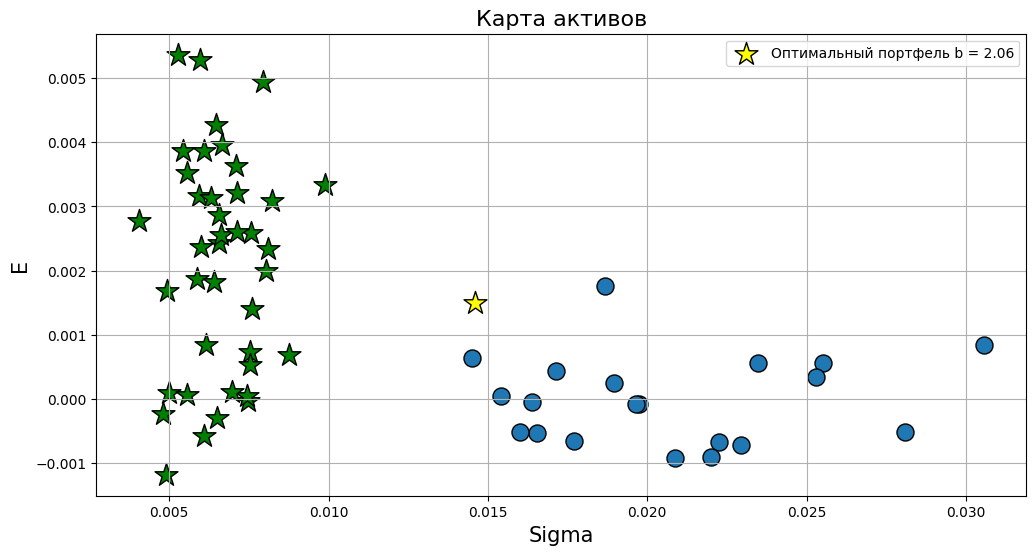

In [126]:
plot_mean_var_map(stats_all.loc[selected20.columns], title='Карта активов')

for experiment in cvar_experiments:
    plt.scatter(risk_portfolio(experiment['cvar_X_est'][T:N+T], experiment['cov_matrix_est']),
                np.dot(experiment['mean_vec_est'], experiment['cvar_X_est'][T:N+T]), 
                c='green',
                marker='*',
                s=300, 
                edgecolors='black')
plt.scatter(risk_portfolio(X, cov_matrix),
            np.dot(mean_vec,X), 
            c='yellow',
            marker='*',
            s=300, 
            edgecolors='black',
            label='Оптимальный портфель b = %.2f' % b)
plt.legend()
pass

Исходя из 40 проведённых экспериментов, можно сделать вывод, что оценка истиного потрфеля лучше, чем в п. 2.5